# **CLASIFICACIÓN MULTIPLE - POPULARIDAD**

**Integrantes de equipo:**
* Julio César Choquehuayta Quenta  2018-119025
* Carlos Enrique Yufra Loza		     2019-119051
* Pablo Moisés Aro Galindo		     2019-119034
* Carlos Manuel Azañero Otoya	     2015-119026
* Jose Angel Castro Caceres		     2017-119054


## DESCRIPCION DEL PROBLEMA

La industria de la musica es bastante popular en la actualidad, como lo que escucha las personajes cambia con el tiempo, ya sea por tendencias o moda, mucho de lo que determina su popularidad suele ser subjetivo o circunstancial. Sim embargo tomando en cuenta datos tecnicos o variables presentes en la musica, se tendra como objetivo el determinar si es popular o no.

Este proyecto se enfocara en un problema de clasificacion multiple, el cual hara uso de una dataset de Spotify de pistas en un rango de 125 géneros diferentes. Cada pista tiene algunas funciones de audio asociadas. Los datos están en formato CSV, que es tabular y se puede cargar rápidamente.

Link del Dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download

## ANALISIS EXPLORATORIO

Primero, nosotros necesitamos tener la dataset descargada y almacenada en una carpeta en drive para su proximo uso, ademas de importar las librerias necesarias.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Nosotros cargamos la dataset usando pandas read_csv, junto con el link de donde esta nuestra data en drive

In [ ]:
# Obtenemos el dataset de las Canciones de Spotify y lo almacenamos en un DataFrame
df = pd.read_csv("https://drive.google.com/uc?id=1gAkvuBkYAEKCdf9CYqePni8TacqkwWt3")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## PRE-PROCESAMIENTO DE LOS DATOS

In [ ]:
# Convertimos la columna 'popularity' en 'popularity_class'(0:baja, 1:media, 2:alta)
df['popularity_class'] = 0
df.loc[df['popularity'] > 30, 'popularity_class'] = 1
df.loc[df['popularity'] > 70, 'popularity_class'] = 2

In [ ]:
# Extraemos una muestra de 100 000 registros aleatorios
df_sample = df.sample(100000)

# Filtramos las entradas y la salida que usaremos para el modelo
columns = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo','popularity_class']
df_columns = df_sample[columns]
df_columns.nunique() # visualizamos la cantidad de valores únicos de las columnas

danceability         1151
energy               2041
loudness            18807
speechiness          1478
acousticness         4995
instrumentalness     5326
valence              1777
tempo               42471
popularity_class        3
dtype: int64

In [ ]:
# Visualizamos algunos registros filtrados por el valor de 'popularity_class'
df_columns.query('popularity_class == 1')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,popularity_class
23775,0.731,0.988,-5.174,0.1220,0.00251,0.799000,0.155,125.993,1
9365,0.661,0.529,-5.330,0.0312,0.64800,0.000000,0.328,121.892,1
104241,0.304,0.328,-10.311,0.0351,0.56000,0.000000,0.243,119.675,1
72140,0.582,0.928,-4.659,0.0635,0.00876,0.000005,0.565,113.043,1
77744,0.504,0.743,-6.529,0.1050,0.55500,0.000000,0.707,90.425,1
...,...,...,...,...,...,...,...,...,...
47429,0.521,0.721,-7.699,0.0254,0.00348,0.011300,0.611,97.578,1
105246,0.736,0.289,-11.398,0.0494,0.93000,0.839000,0.150,68.987,1
89948,0.664,0.893,-3.627,0.1500,0.07480,0.000000,0.773,104.007,1
19813,0.666,0.252,-17.614,0.0264,0.54800,0.022100,0.547,94.111,1


In [ ]:
# Visualizamos algunas estadísticas de nuestros datos
df_columns.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,popularity_class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.566666,0.641036,-8.260964,0.084568,0.315636,0.156273,0.474087,122.109972,0.588510
std,0.173611,0.251811,5.034996,0.105598,0.332711,0.309847,0.259359,29.992976,0.572546
min,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.471000,-10.013000,0.035900,0.017000,0.000000,0.260000,99.065000,0.000000
50%,0.580000,0.684000,-7.004000,0.048900,0.170000,0.000042,0.464000,122.011000,1.000000
75%,0.694000,0.854000,-5.004000,0.084400,0.599000,0.049000,0.683000,140.068250,1.000000
max,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,0.994000,243.372000,2.000000


In [ ]:
# Pasamos los datos del DF a un arreglo
data = df_columns.values

# Separamos las características de las etiquetas
x_data = data[:, :-1]
y_data = data[:, -1]

print("X:")
print(x_data)
print("y:")
print(y_data)

X:
[[ 5.23000e-01  9.12000e-01 -2.24300e+00 ...  0.00000e+00  8.24000e-01
   1.61906e+02]
 [ 5.17000e-01  6.09000e-01 -5.70200e+00 ...  0.00000e+00  2.39000e-01
   9.20930e+01]
 [ 7.31000e-01  9.88000e-01 -5.17400e+00 ...  7.99000e-01  1.55000e-01
   1.25993e+02]
 ...
 [ 6.66000e-01  2.52000e-01 -1.76140e+01 ...  2.21000e-02  5.47000e-01
   9.41110e+01]
 [ 4.39000e-01  4.46000e-01 -8.11300e+00 ...  0.00000e+00  3.00000e-01
   1.42837e+02]
 [ 4.20000e-01  6.46000e-01 -7.61500e+00 ...  1.53000e-02  8.77000e-01
   1.42209e+02]]
y:
[0. 0. 1. ... 1. 1. 0.]


In [ ]:
# Verificamos las dimensiones de los arreglos
print("X:")
print(x_data.shape)
print("y:")
print(y_data.shape)

X:
(100000, 8)
y:
(100000,)


In [ ]:
# Obtenemos la media y la desviación estándar de cada característica
x_mean = x_data.mean(axis = 0)
x_std = x_data.std(axis = 0)

# Normalizamos las características del modelo y convertimos a float32
x_data = (x_data - x_mean) / x_std
x_data= x_data.astype(np.float32)

# Verificamos los datos normalizados
x_data

array([[-0.25151557,  1.0760666 ,  1.1952331 , ..., -0.5043599 ,
         1.3491517 ,  1.3268516 ],
       [-0.2860758 , -0.1272223 ,  0.5082381 , ..., -0.5043599 ,
        -0.9064179 , -1.000805  ],
       [ 0.946572  ,  1.3778816 ,  0.6131046 , ...,  2.0743487 ,
        -1.2302946 ,  0.12946522],
       ...,
       [ 0.5721696 , -1.5449587 , -1.8576149 , ..., -0.43303394,
         0.28112987, -0.93352234],
       [-0.7353586 , -0.77453613,  0.02938719, ..., -0.5043599 ,
        -0.6712218 ,  0.6910662 ],
       [-0.84479934,  0.01971398,  0.12829542, ..., -0.45498037,
         1.5535026 ,  0.67012787]], dtype=float32)

In [ ]:
# Separamos aleatoriamente los datos de entrenamiento(80%) y de prueba(20%)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=20)

In [ ]:
# Definimos el modelo
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.125))
model.add(Dense(512, activation='relu'))
# model.add(layers.Dropout(0.125))
model.add(Dense(512, activation='relu'))
# model.add(layers.Dropout(0.125))
model.add(Dense(512*1, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

# Entrenamos el modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=1024)

Epoch 1/100
63/63 [==============================] - 2s 9ms/step - loss: 0.8104 - accuracy: 0.5655 - val_loss: 0.7958 - val_accuracy: 0.5860
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 0.7830 - accuracy: 0.5914 - val_loss: 0.7855 - val_accuracy: 0.5954
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7759 - accuracy: 0.6007 - val_loss: 0.7784 - val_accuracy: 0.5989
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7705 - accuracy: 0.6031 - val_loss: 0.7803 - val_accuracy: 0.5960
Epoch 5/100
63/63 [==============================] - 0s 6ms/step - loss: 0.7685 - accuracy: 0.6081 - val_loss: 0.7751 - val_accuracy: 0.6044
Epoch 6/100
63/63 [==============================] - 0s 6ms/step - loss: 0.7625 - accuracy: 0.6135 - val_loss: 0.7716 - val_accuracy: 0.6060
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7587 - accuracy: 0.6162 - val_loss: 0.7689 - val_accuracy: 0.6089
Epoch 8/100
6

In [ ]:
# Guardamos los datos del entrenamiento
history_dict = history.history
history_dict

{'loss': [0.81043541431427,
  0.783037543296814,
  0.7758663892745972,
  0.7705049514770508,
  0.7685242891311646,
  0.7624958157539368,
  0.758703351020813,
  0.7567902207374573,
  0.7531402707099915,
  0.7504097819328308,
  0.746046781539917,
  0.7415114045143127,
  0.7376968264579773,
  0.7325431108474731,
  0.7278305292129517,
  0.724018394947052,
  0.7201322317123413,
  0.7114274501800537,
  0.7070450782775879,
  0.7013481855392456,
  0.6941251158714294,
  0.6871050000190735,
  0.679010272026062,
  0.6727263331413269,
  0.6652444005012512,
  0.6577200889587402,
  0.6474365592002869,
  0.6393818855285645,
  0.6318901181221008,
  0.6209021210670471,
  0.6115968823432922,
  0.6022710800170898,
  0.595801591873169,
  0.58481764793396,
  0.5761724710464478,
  0.5635596513748169,
  0.5544502139091492,
  0.5483798980712891,
  0.5335936546325684,
  0.5265988707542419,
  0.5144517421722412,
  0.5052611827850342,
  0.4970416724681854,
  0.4858230650424957,
  0.47665101289749146,
  0.4662398

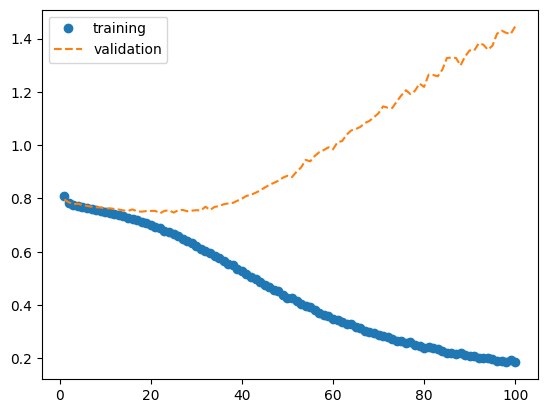

In [ ]:
# Guardamos los valores de perdida en dos arreglos para entrenamiento y validacion
i=0
loss_values = history_dict["loss"][i:]
val_loss_values = history_dict["val_loss"][i:]

# Graficamos los valores de perdida
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

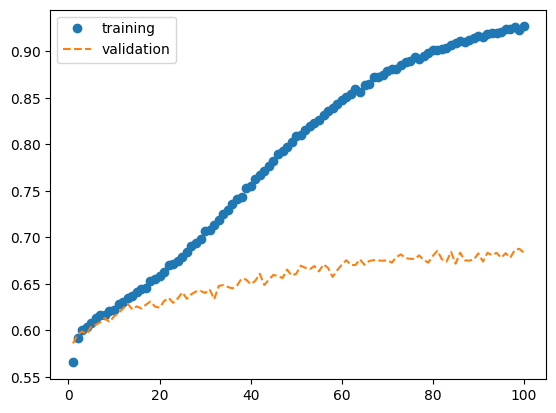

In [ ]:
# Guardamos los valores de precisión en dos arreglos para entrenamiento y validacion
i=0
loss_values = history_dict["accuracy"][i:]
val_loss_values = history_dict["val_accuracy"][i:]

# Graficamos los valores de precisión
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# evaluamos el modelo
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 2ms/step - loss: 1.4669 - accuracy: 0.6852


[1.4668784141540527, 0.6851500272750854]

In [ ]:
# Predecimos en base a los datos de prueba
y_predict_prob = model.predict(X_test)

# Convertimos las probabilidades en clases
y_predict = np.argmax(y_predict_prob, axis=1)

625/625 [==============================] - 1s 2ms/step


In [ ]:
# Verificamos algunos casos individuales
pos = 31
print("y: " , y_test[pos])
print("y predict:", y_predict[pos])

y:  1.0
y predict: 1


In [ ]:
# Matriz de Confusion
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_predict) * 100))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

Accuracy: 68.52%
Confusion Matrix:
[[6300 2657  134]
 [2887 7026  168]
 [ 205  246  377]]
